In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-pokedex/Pokemon.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df= pd.read_csv('/kaggle/input/pokemon-pokedex/Pokemon.csv')

In [4]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
len(df)

1104

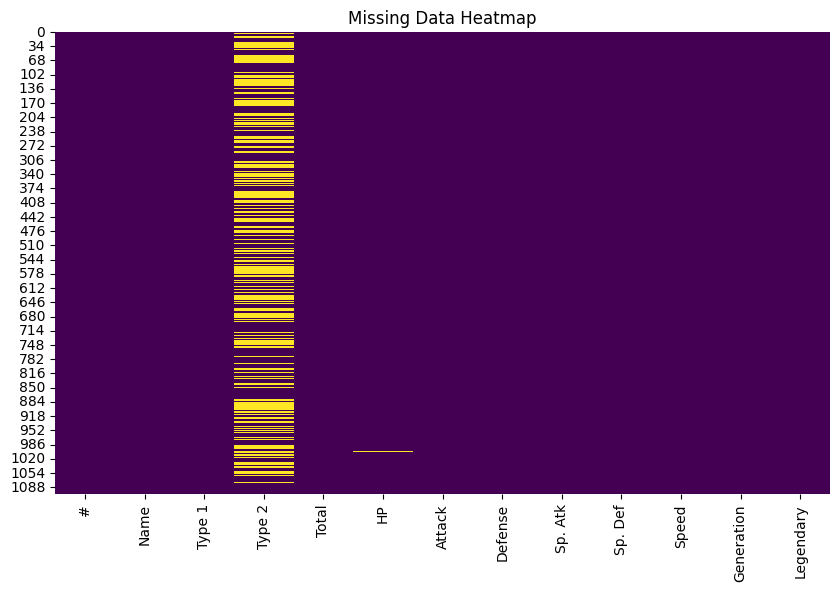

In [6]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
     

In [7]:
(df['Type 2'].isnull().sum()/len(df))*100

46.3768115942029

In [8]:
df['Type 2'].fillna(value='Not Known', inplace=True)

/tmp/ipykernel_18/1140188274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna(value='Not Known', inplace=True)


In [9]:
df.drop(columns=['#'], inplace=True)

In [10]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
# Find the Pokemon with the highest Attack
best_pokemon_total = df.loc[df['Total'].idxmax()]

best_pokemon_HP = df.loc[df['HP'].idxmax()]

best_pokemon_Speed = df.loc[df['Speed'].idxmax()]

best_attack_pokemon = df.loc[df['Attack'].idxmax()]

# Find the Pokemon with the highest Defense
best_defense_pokemon = df.loc[df['Defense'].idxmax()]

# Find the Pokemon with the highest Special Attack
best_sp_attack_pokemon = df.loc[df['Sp. Atk'].idxmax()]

# Find the Pokemon with the highest Special Defense
best_sp_defense_pokemon = df.loc[df['Sp. Def'].idxmax()]

# Print out the best Pokemon for each category
print("Best Attack Pokemon:")
print(best_attack_pokemon)
print("\nBest Defense Pokemon:")
print(best_defense_pokemon)
print("\nBest Special Attack Pokemon:")
print(best_sp_attack_pokemon)
print("\nBest Special Defense Pokemon:")
print(best_sp_defense_pokemon)

# Plotting the comparison
categories = ['Total','HP','Speed','Attack', 'Defense', 'Sp. Atk', 'Sp. Def']
pokemon_names = df['Name']



Best Attack Pokemon:
Name          MewtwoMega Mewtwo X
Type 1                    Psychic
Type 2                   Fighting
Total                         780
HP                          106.0
Attack                        190
Defense                       100
Sp. Atk                       154
Sp. Def                       100
Speed                         130
Generation                      1
Legendary                    True
Name: 163, dtype: object

Best Defense Pokemon:
Name          SteelixMega Steelix
Type 1                      Steel
Type 2                     Ground
Total                         610
HP                           75.0
Attack                        125
Defense                       230
Sp. Atk                        55
Sp. Def                        95
Speed                          30
Generation                      2
Legendary                   False
Name: 224, dtype: object

Best Special Attack Pokemon:
Name          MewtwoMega Mewtwo Y
Type 1                    

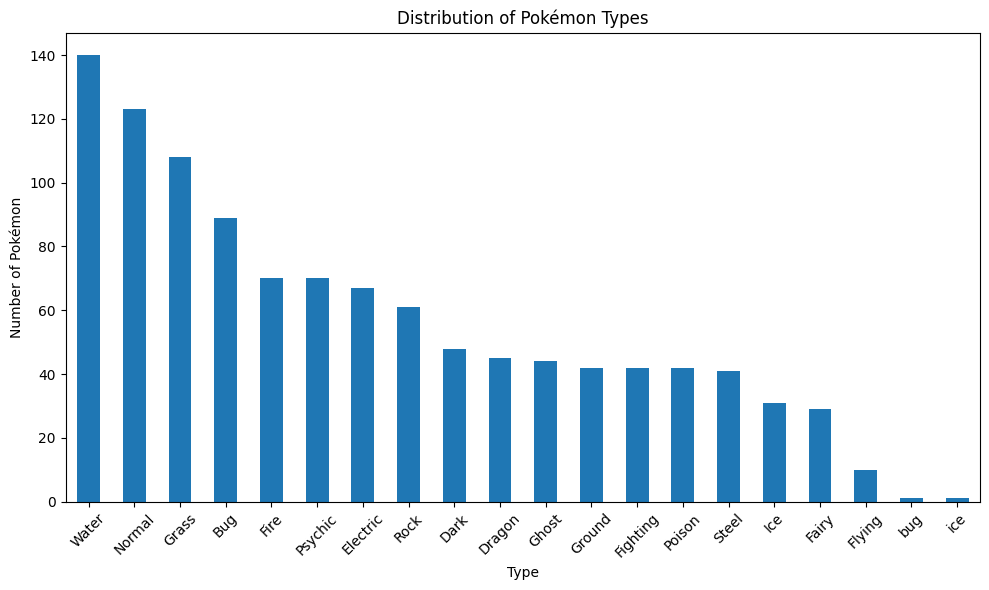

In [12]:
# Count the occurrences of each type
type_counts = df['Type 1'].value_counts()

# Plotting the type distribution
plt.figure(figsize=(10,6))
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.title('Distribution of Pokémon Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

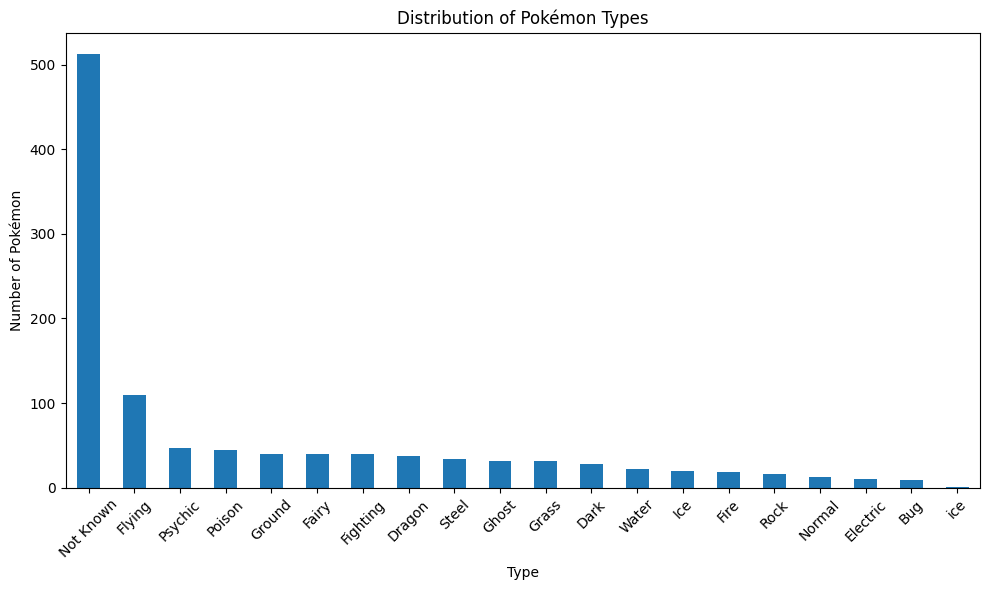

In [13]:
# Count the occurrences of each type
type_counts = df['Type 2'].value_counts()

# Plotting the type distribution
plt.figure(figsize=(10,6))
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.title('Distribution of Pokémon Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

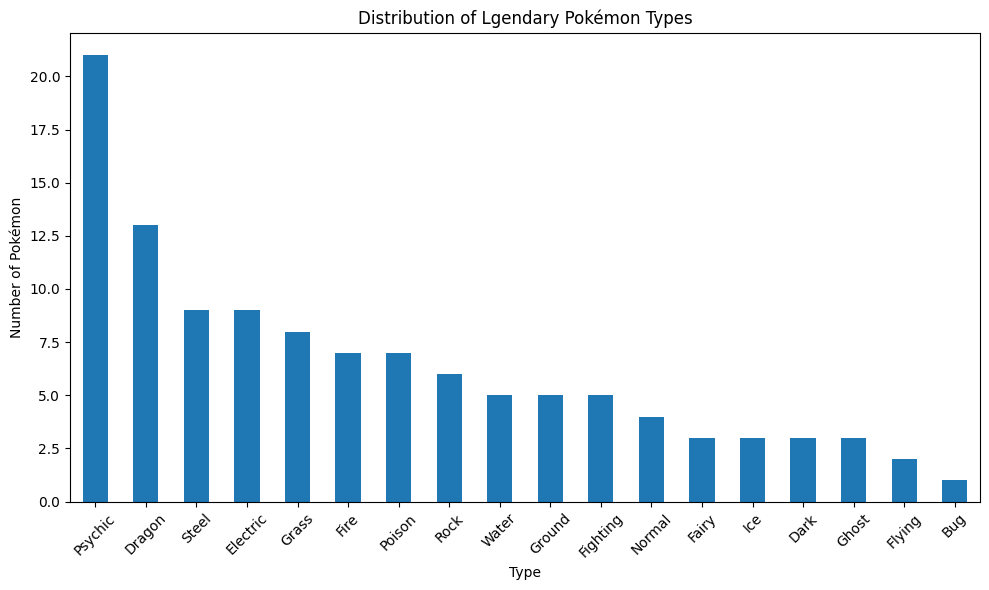

In [14]:
# Count the occurrences of each type
df1 = df[df['Legendary'] == True]
type_counts = df1['Type 1'].value_counts()

# Plotting the type distribution
plt.figure(figsize=(10,6))
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.title('Distribution of Lgendary Pokémon Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

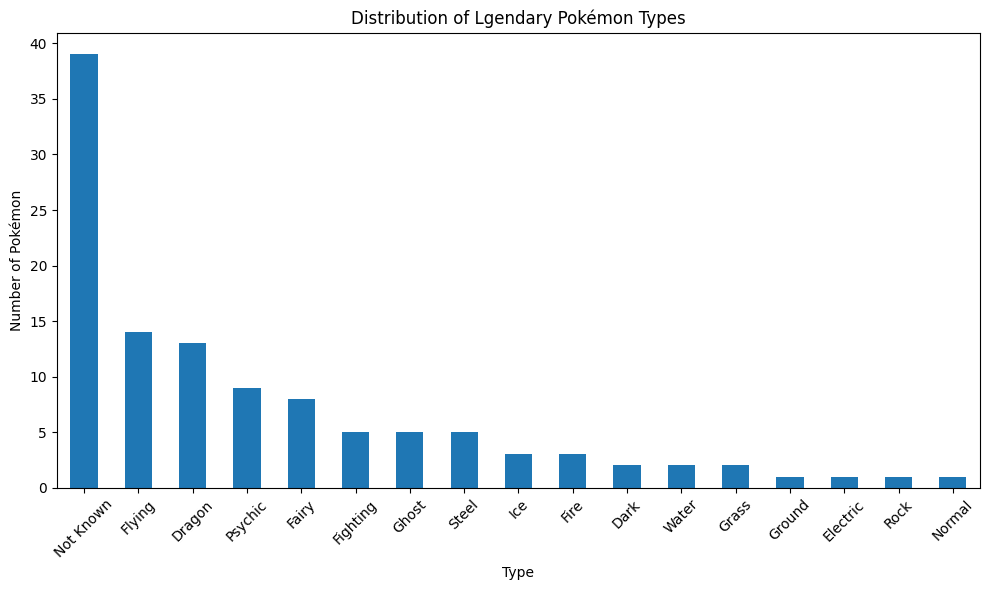

In [15]:
type_counts = df1['Type 2'].value_counts()

# Plotting the type distribution
plt.figure(figsize=(10,6))
type_counts.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.title('Distribution of Lgendary Pokémon Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

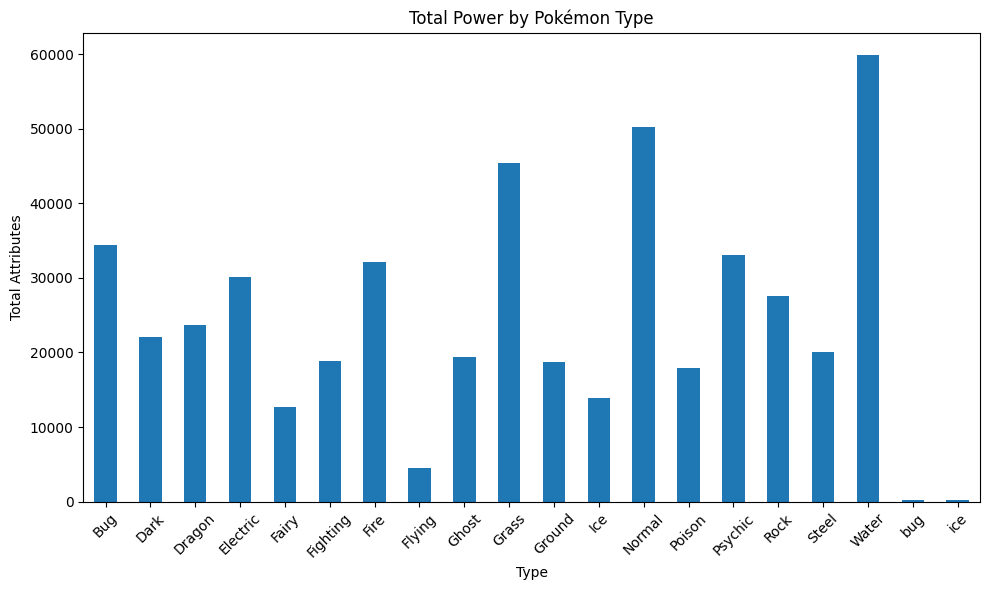

In [16]:
# Group by type and sum the total attributes
type_totals = df.groupby('Type 1')['Total'].sum()

# Plotting the type totals
plt.figure(figsize=(10,6))
type_totals.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Total Attributes')
plt.title('Total Power by Pokémon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

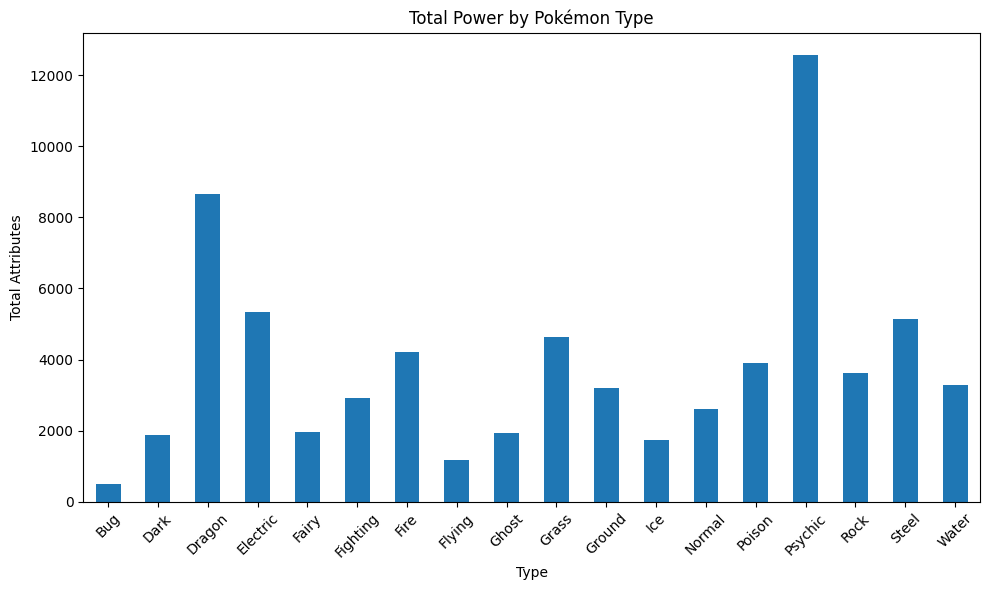

In [17]:
# Group by type and sum the total attributes
type_totals = df1.groupby('Type 1')['Total'].sum()

# Plotting the type totals
plt.figure(figsize=(10,6))
type_totals.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Total Attributes')
plt.title('Total Power by Pokémon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

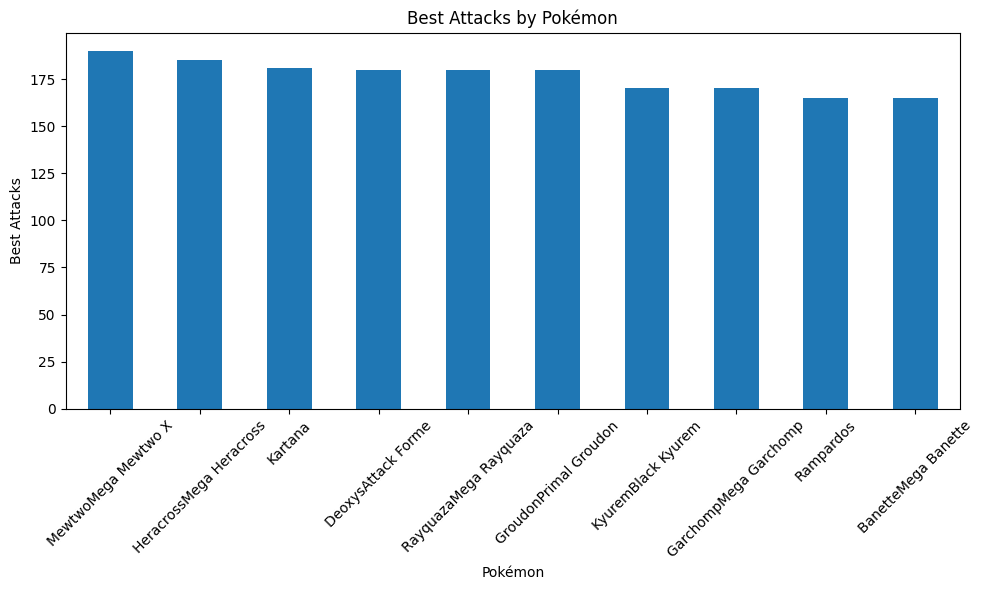

In [18]:
# Group by type and sum the total attributes
type_totals = df.groupby('Name')['Attack'].sum()
type_totals = type_totals.sort_values(ascending=False).head(10)


# Plotting the type totals
plt.figure(figsize=(10,6))
type_totals.plot(kind='bar')
plt.xlabel('Pokémon')
plt.ylabel('Best Attacks')
plt.title('Best Attacks by Pokémon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

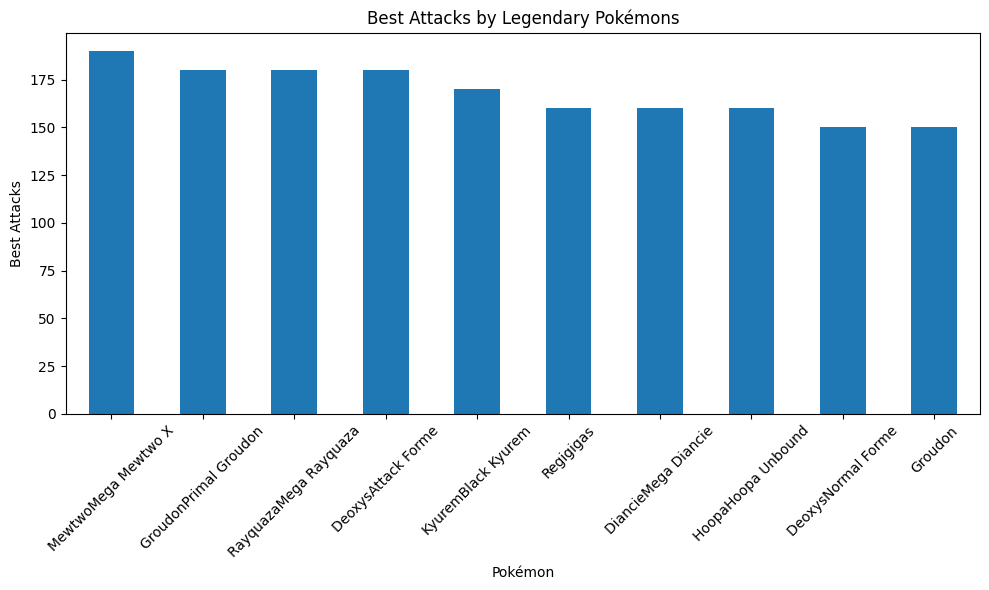

In [19]:
# Group by type and sum the total attributes
type_totals = df1.groupby('Name')['Attack'].sum()
type_totals = type_totals.sort_values(ascending=False).head(10)


# Plotting the type totals
plt.figure(figsize=(10,6))
type_totals.plot(kind='bar')
plt.xlabel('Pokémon')
plt.ylabel('Best Attacks')
plt.title('Best Attacks by Legendary Pokémons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()